In [1]:
%pip install scipy==1.8.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import title
from numpy import linalg as LA

# Scale-free numerical example

In [8]:
# a function that generates a scale-free network with n nodes
def scale_free_network(n, alpha, beta, gamma):
    G = nx.scale_free_graph(n, alpha=alpha, beta=beta, gamma=gamma)
    # get adjacency matrix
    A = nx.adjacency_matrix(G)
    # get maximum eigenvalue
    eig = LA.eigvals(A.todense())
    eig_max = max(eig)
    # get abs of minimum eigenvalue
    eig_min = abs(min(eig))
    return eig_max, eig_min

In [ ]:
n_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
eig_max_avg_list = []
eig_min_avg_list = []
iteration = 100000
for n in n_list:
    eig_max = 0
    eig_min = 0
    min_max_eigval = 100
    for i in range(iteration):
        # three random numbers that sum up to one
        alpha = random.random()
        beta = random.random()
        gamma = random.random()
        s = alpha + beta + gamma
        alpha /= s
        beta /= s
        gamma /= s
        # generate a random scale-free network
        max_temp, min_temp = scale_free_network(n, alpha, beta, gamma)
        eig_max += max_temp
        eig_min += min_temp
    eig_max /= iteration
    eig_min /= iteration
    eig_max_avg_list.append(eig_max)
    eig_min_avg_list.append(eig_min)

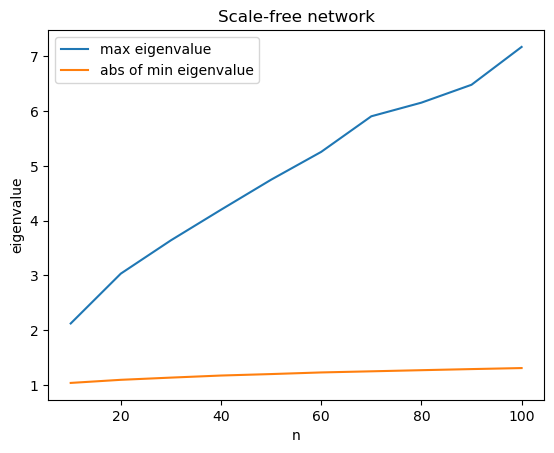

In [13]:
plt.plot(n_list, eig_max_avg_list, label='max eigenvalue')
plt.plot(n_list, eig_min_avg_list, label='abs of min eigenvalue')
plt.xlabel('n')
plt.ylabel('eigenvalue')
plt.title('Scale-free network')
plt.legend()
plt.savefig('scale_free_network.png')
plt.show()


# Small world network numerical example

In [32]:
# a function that generates a watts strogatz small world network with n nodes
def watts_strogatz_network(n, k, p):
    G = nx.watts_strogatz_graph(n, k, p)
    # get adjacency matrix
    A = nx.adjacency_matrix(G)
    # get maximum eigenvalue
    eig = LA.eigvals(A.todense())
    eig_max = max(eig)
    # get abs of minimum eigenvalue
    eig_min = abs(min(eig))
    return eig_max, eig_min

In [35]:
n_list = [10, 20, 30, 40, 50]
eig_max_avg_list = []
eig_min_avg_list = []
iteration = 100000
for n in n_list:
    eig_max = 0
    eig_min = 0
    min_max_eigval = 100
    for i in range(iteration):
        # random numbers between 0 and 1
        p = random.random()
        # random integer between 0 and n-1
        k = random.randint(2, n-1)
        # generate a watts-strogatz small world network
        max_temp, min_temp = watts_strogatz_network(n, k, p)
        eig_max += max_temp
        eig_min += min_temp
    eig_max /= iteration
    eig_min /= iteration
    eig_max_avg_list.append(eig_max)
    eig_min_avg_list.append(eig_min)
    print("done with n = ", n)

/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_1188/106732340.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


done with n =  10
done with n =  20
done with n =  30
done with n =  40
done with n =  50


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


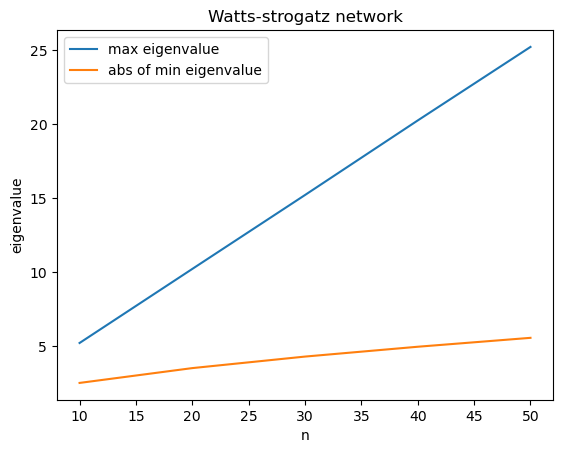

In [36]:
plt.plot(n_list, eig_max_avg_list, label='max eigenvalue')
plt.plot(n_list, eig_min_avg_list, label='abs of min eigenvalue')
plt.xlabel('n')
plt.ylabel('eigenvalue')
plt.title('Watts-strogatz network')
plt.legend()
plt.savefig('small_world_network.png')
plt.show()